In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print('Train score: ', model.evaluate(X_train, y_train))
print('Test score: ', model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 4ms/sample - loss: 0.6803 - accuracy: 0.6115 - val_loss: 0.6765 - val_accuracy: 0.6064
Epoch 2/100
381/381 [==============================] - 0s 449us/sample - loss: 0.6159 - accuracy: 0.6693 - val_loss: 0.6107 - val_accuracy: 0.6649
Epoch 3/100
381/381 [==============================] - 0s 97us/sample - loss: 0.5585 - accuracy: 0.6903 - val_loss: 0.5552 - val_accuracy: 0.7074
Epoch 4/100
381/381 [==============================] - 0s 100us/sample - loss: 0.5119 - accuracy: 0.7297 - val_loss: 0.5061 - val_accuracy: 0.7713
Epoch 5/100
381/381 [==============================] - 0s 92us/sample - loss: 0.4712 - accuracy: 0.7717 - val_loss: 0.4646 - val_accuracy: 0.7872
Epoch 6/100
381/381 [==============================] - 0s 94us/sample - loss: 0.4366 - accuracy: 0.8136 - val_loss: 0.4294 - val_accuracy: 0.8245
Epoch 7/100
381/381 [==============================] - 0s 79us/sample - loss:

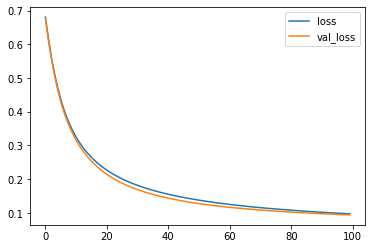

In [13]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

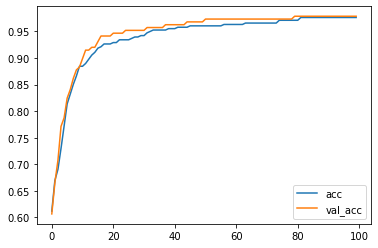

In [14]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
p = model.predict(X_test)
print(p)

[[9.96854484e-01]
 [8.80650282e-01]
 [9.88344669e-01]
 [3.63245746e-03]
 [9.25271869e-01]
 [5.81358969e-01]
 [1.88552763e-03]
 [9.55697477e-01]
 [6.96773057e-08]
 [3.28504783e-03]
 [8.05899382e-01]
 [9.40219879e-01]
 [3.22447886e-04]
 [9.70484734e-01]
 [1.01899891e-03]
 [9.92369890e-01]
 [9.97675955e-01]
 [2.54380400e-04]
 [8.25856686e-01]
 [9.95160282e-01]
 [6.88434124e-01]
 [6.62983221e-04]
 [8.25364084e-04]
 [9.98492956e-01]
 [8.01033378e-01]
 [2.54026061e-04]
 [1.60196517e-02]
 [9.96702969e-01]
 [3.64747971e-01]
 [9.99509931e-01]
 [9.82115030e-01]
 [9.84761357e-01]
 [6.39894187e-01]
 [7.77278483e-01]
 [6.83991462e-02]
 [9.96203959e-01]
 [2.68110428e-02]
 [9.83650863e-01]
 [9.79104161e-01]
 [9.99439061e-01]
 [1.07899150e-02]
 [3.97891476e-04]
 [9.82614458e-01]
 [9.51982081e-01]
 [9.07848477e-01]
 [8.91931534e-01]
 [9.68246400e-01]
 [3.05184424e-01]
 [1.47103402e-03]
 [8.76523614e-01]
 [4.56994139e-02]
 [4.40578461e-01]
 [9.98793960e-01]
 [1.28167719e-01]
 [9.75185037e-01]
 [8.780444

In [16]:
p = np.round(p).flatten()

In [17]:
print(p)

[1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.]


In [19]:
print('Manual Cal Acc:', np.mean(p == y_test))
print('Eval output:', model.evaluate(X_test, y_test))

Manual Cal Acc: 0.9787234042553191
188/188 [==============================] - 0s 37us/sample - loss: 0.0941 - accuracy: 0.9787
Eval output: [0.09413075954356093, 0.9787234]


In [20]:
model.save('linear_classification.h5')

In [21]:
model = tf.keras.models.load_model('linear_classification.h5')
print(model.layers)
model.evaluate(X_test, y_test)

188/188 [==============================] - 0s 612us/sample - loss: 0.0941 - accuracy: 0.9787


[0.09413075954356093, 0.9787234]